In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from scipy.stats import t
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter


## Grid search 1

In [2]:
# Read simulation outputs

# SSE
file = open('../output/tuning/com_output_m_error_revised_1.obj', 'rb')
com_error1 = pickle.load(file)
com_error1_df = pd.DataFrame(com_error1)

file = open('../output/tuning/nom_output_m_error_revised_1.obj', 'rb')
nom_error1 = pickle.load(file)
nom_error1_df = pd.DataFrame(nom_error1)

file = open('../output/tuning/nom_soc_output_m_error_1.obj', 'rb')
nom_soc_error1 = pickle.load(file)
nom_soc_error1_df = pd.DataFrame(nom_soc_error1)


# individual output
file = open('../output/tuning/com_output_child_revised_1.obj', 'rb')
com_child1 = pickle.load(file)

file = open('../output/tuning/nom_output_child_revised_1.obj', 'rb')
nom_child1 = pickle.load(file)

file = open('../output/tuning/nom_soc_output_child_1.obj', 'rb')
nom_soc_child1 = pickle.load(file)

In [3]:
# SSE of all parameter combinations
com_error1_df = com_error1_df.round(decimals=4)
com_error1_df = com_error1_df.pivot(index=0, columns=1,values=2)

nom_error1_df = nom_error1_df.round(decimals=4)
nom_error1_df = nom_error1_df.pivot(index=0, columns=1,values=2)

nom_soc_error1_df = nom_soc_error1_df.round(decimals=4)
nom_soc_error1_df = nom_soc_error1_df.pivot(index=0, columns=1,values=2)

nom_soc_error1_df

1,0.001,0.050,0.100,0.150,0.200,0.250,0.300,0.350,0.400,0.450,...,0.550,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000
0,,,,,,,,,,,,,,,,,,,,,
0.001,0.0090,1.0277,1.272100e+00,1.3749,1.4159,1.440300e+00,9.416671e+86,1.042040e+87,7.394740e+83,1.316920e+74,...,2.486760e+38,1.100987e+08,1.6130,1.6165,1.6242,1.6314,1.6509,1.6476,1.6536,1.6931
0.050,0.0104,5.8151,1.280890e+01,5.8798,2.9365,1.641500e+00,9.112000e-01,5.123578e+56,1.894657e+89,1.284570e+79,...,4.051016e+42,3.380006e+11,0.2893,0.3569,0.4612,0.5908,0.7164,0.8153,1.0748,1.6931
0.100,0.0185,0.0298,1.261252e+46,19.3040,20.8256,1.454590e+01,1.213699e+94,9.743508e+94,4.811467e+74,3.927494e+80,...,1.813720e+43,2.089523e+12,0.0537,0.0074,0.0078,0.0592,0.1568,0.3064,0.6874,1.6362
0.150,0.0203,0.0291,5.120000e-02,13.4372,27.7411,9.292917e+34,1.736247e+91,8.611933e+84,2.280208e+91,1.373490e+82,...,6.034174e+43,2.045550e+12,0.9334,0.5868,0.2570,0.1052,0.0200,0.0380,0.2776,1.3436
0.200,0.0176,0.0238,3.450000e-02,1.3850,16.8590,3.224160e+01,5.126435e+10,6.695110e+92,2.659362e+91,4.168008e+81,...,2.286822e+43,9.710536e+12,2.9028,1.5984,1.2777,0.4773,0.4095,0.0827,0.1123,0.9781
0.250,0.0146,0.0203,3.000000e-02,0.0426,0.7644,6.137600e+00,9.780037e+19,1.579368e+91,8.605124e+91,1.624803e+81,...,8.431989e+42,1.213418e+13,5.5531,4.3733,3.0743,1.5423,1.0025,0.3328,0.0259,0.9553
0.300,0.0120,0.0162,2.240000e-02,0.0299,0.0463,6.180000e-02,7.810300e+00,1.519100e+01,1.858391e+89,2.946458e+82,...,9.184454e+42,1.484567e+13,9.7484,7.3527,5.3119,3.2088,1.8637,0.5077,0.0035,0.7973
0.350,0.0098,0.0129,1.740000e-02,0.0216,0.0300,4.170000e-02,1.690000e-01,2.762600e+00,3.288091e+91,2.269014e+81,...,2.388911e+40,1.468882e+13,10.4296,10.3043,7.5944,4.8354,3.6908,1.8326,0.1079,0.4838
0.400,0.0080,0.0102,1.430000e-02,0.0190,0.0279,3.580000e-02,3.570000e-02,2.435100e+00,1.491130e+01,1.563290e+71,...,1.509744e+43,3.419884e+12,13.1602,10.5705,8.0879,7.0976,4.4837,3.7474,0.2348,0.3616


In [4]:
# Calculate proportion of agents changing PAL
def calc_prop_change_pal(file_child, file_error):
    proplist = []
    for dat in file_child:
        datlist = []
        for key in dat:
            datlist.append(dat[key])

        res_ind = pd.concat(datlist, axis=1)
        dif = res_ind.iloc[1999] - res_ind.iloc[0]
        proplist.append(dif[dif != 0].count()/dif.count())

    prop = pd.DataFrame(proplist)
    result_prop = pd.DataFrame(file_error)
    result_prop["prop"] = prop

    prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")

    return(prop_df)

# Proportion of agents changing PAL
com_prop_df = calc_prop_change_pal(com_child1, com_error1)
nom_prop_df = calc_prop_change_pal(nom_child1, nom_error1)
nom_soc_prop_df = calc_prop_change_pal(nom_soc_child1, nom_soc_error1)

/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


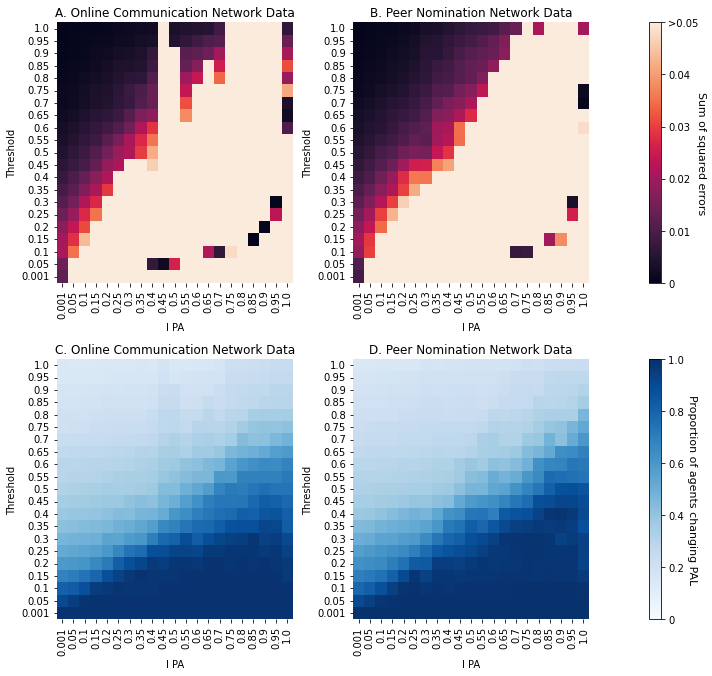

In [24]:
# plot heatmap of grid search 1

fig, axs = plt.subplots(2, 3, figsize=(10, 9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))
#fig.suptitle('Grid Search (Sum of Squared Errors)')
axs[0,0].set_title('A. Online Communication Network Data')
sns.heatmap(com_error1_df, vmin=0, vmax=0.05, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Peer Nomination Network Data')
sns.heatmap(nom_soc_error1_df, vmin=0, vmax=0.05, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.01','0.02','0.03','0.04','>0.05 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)

axs[1,0].set_title('C. Online Communication Network Data')
sns.heatmap(com_prop_df, vmin=0, vmax=1, ax = axs[1,0], cmap="Blues", cbar=False).invert_yaxis()
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')

axs[1,1].set_title('D. Peer Nomination Network Data')
sns.heatmap(nom_soc_prop_df, vmin=0, vmax=1, ax = axs[1,1], cmap="Blues", cbar=False).invert_yaxis()
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')

cbar2 = fig.colorbar(axs[1,1].collections[0], cax=axs[1,2])
cbar2.ax.set_yticklabels(['0','0.2','0.4','0.6', '0.8', '1.0   '])
cbar2.set_label('Proportion of agents changing PAL', fontsize=11, rotation=270)

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search1_revised.eps', bbox_inches='tight', format='eps', dpi=1000)
plt.show()


## Grid search 2

In [3]:
# Read tuning model outputs
file = open('../output/tuning/com_output_m_error_revised_2.obj', 'rb')
com_error2 = pickle.load(file)
com_error2_df = pd.DataFrame(com_error2)

file = open('../output/tuning/nom_output_m_error_revised_2.obj', 'rb')
nom_error2 = pickle.load(file)
nom_error2_df = pd.DataFrame(nom_error2)

file = open('../output/tuning/nom_soc_output_m_error_2.obj', 'rb')
nom_soc_error2 = pickle.load(file)
nom_soc_error2_df = pd.DataFrame(nom_soc_error2)


In [4]:
# Read parameter combinations selected.
pars_communication = pd.read_csv('../output/opt_pars_m_communication_revised.csv', sep=',', header=0)
pars_nomination = pd.read_csv('../output/opt_pars_m_nomination_revised.csv', sep=',', header=0)
pars_nomination_social = pd.read_csv('../output/opt_pars_m_nomination_social.csv', sep=',', header=0)


In [5]:
# SSE of all parameter combinations
com_error2_df = com_error2_df.round(decimals=4)
com_error2_df = com_error2_df.pivot(index=0, columns=1,values=2)

nom_error2_df = nom_error2_df.round(decimals=4)
nom_error2_df = nom_error2_df.pivot(index=0, columns=1,values=2)

nom_soc_error2_df = nom_soc_error2_df.round(decimals=4)
nom_soc_error2_df = nom_soc_error2_df.pivot(index=0, columns=1,values=2)

/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


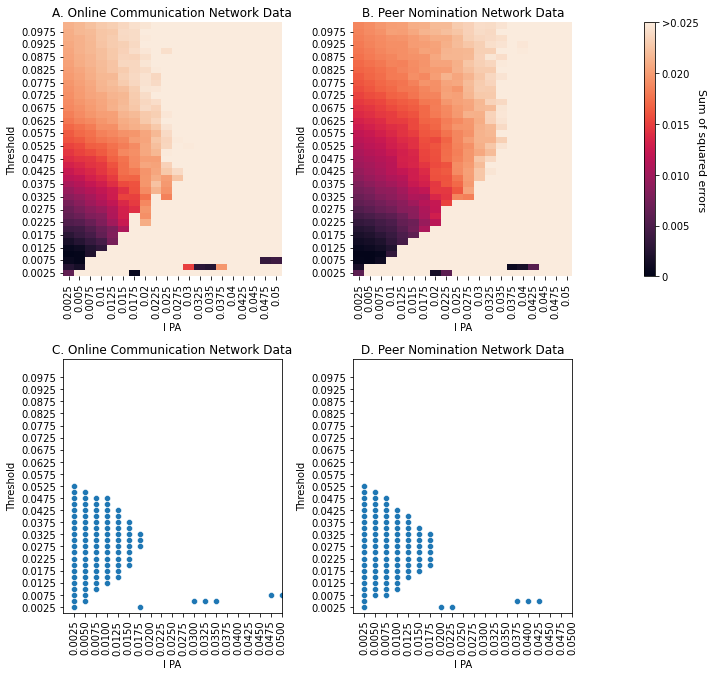

In [23]:
# plot of grid search 2
fig, axs = plt.subplots(2, 3, figsize=(10,9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))

#kwargs = {'alpha':1,'linewidth':0.5,'linecolor':'k','rasterized':True, 'edgecolor':'k', 'capstyle':'projecting'}
axs[0,0].set_title('A. Online Communication Network Data')
sns.heatmap(com_error2_df, vmin=0, vmax=0.025, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Peer Nomination Network Data')
sns.heatmap(nom_soc_error2_df, vmin=0, vmax=0.025, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.005','0.010','0.015','0.020','>0.025 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)

# best fitting parameter combinations
axs[1,0].set_title('C. Online Communication Network Data')
sns.scatterplot(data = pars_communication, x = "ipa", y = "threshold",  palette='crest', ax=axs[1,0])
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')
axs[1,0].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,0].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,0].tick_params(axis='x', rotation=90)
axs[1,0].set_ylim([0.0, 0.105])
axs[1,0].set_xlim([0.0, 0.05])

axs[1,1].set_title('D. Peer Nomination Network Data')
sns.scatterplot(data = pars_nomination_social, x = "ipa", y = "threshold", palette = 'crest', ax=axs[1,1])
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')
axs[1,1].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,1].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,1].tick_params(axis='x', rotation=90)
axs[1,1].set_ylim([0.0, 0.105])
axs[1,1].set_xlim([0.0, 0.05])
#axs[1,1].legend(loc='right', title="SSE") hue = 'error',


axs[1,2].remove()

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search2_revised.eps', bbox_inches='tight', format='eps', dpi=1000)
plt.show()

## Output of tuned model

In [6]:
# Read simulation outputs
file = open('../output/tuning/com_output_cl_revised_3_1.obj', 'rb')
com = pickle.load(file)
com_df = pd.DataFrame(com)

file = open('../output/tuning/nom_output_cl_revised_3_1.obj', 'rb')
nom = pickle.load(file)
nom_df = pd.DataFrame(nom)

file = open('../output/tuning/nom_soc_output_cl_3_1.obj', 'rb')
nom_soc = pickle.load(file)
nom_soc_df = pd.DataFrame(nom_soc)

# Read input variables
input_args = json.loads(open('../input/simulation.json').read())
df_pal = pd.read_csv("../data/Fitbit_Imputation_FINAL.csv", sep=';', header=0, encoding='latin-1')


In [7]:
# Postprocess empirical data
df_pal = df_pal[df_pal['Class'].isin(input_args['classes'])]
df_pal = df_pal.groupby(['Child', 'Class', 'Wave']).mean()['Steps'].reset_index()
# normalize the number of steps: divided by 10,000
df_pal.Steps = df_pal.Steps * 0.0001
df_pal = df_pal.pivot(index='Child', columns='Wave')['Steps']

yr1 = df_pal[1]
yr1_2 = (df_pal[2] + df_pal[2])/2
yr2 = df_pal[4]
yr3 = (df_pal[5] + df_pal[6] + df_pal[7])/3
df_pal_yr = pd.DataFrame({'Year1': yr1, 'Year1.5':yr1_2 ,'Year2': yr2, 'Year3': yr3})

m = df_pal_yr.mean()
med = df_pal_yr.median()
s = df_pal_yr.std()
dof = len(df_pal) - 1
t_crit = np.abs(t.ppf((0.05) / 2, dof))
# length
s_df = pd.DataFrame({'Year': ['Year1', 'Year1.5','Year2', 'Year3'],
                     'len': [df_pal_yr['Year1'].count(), df_pal_yr['Year1.5'].count(), df_pal_yr['Year2'].count(),
                             df_pal_yr['Year3'].count()]})
s_df = s_df.set_index('Year')

#Error
error = s * t_crit / np.sqrt(s_df['len'])
lower = m - error
upper = m + error

data_df = pd.DataFrame({'Day': [0, 120, 365, 730],
                        'Mean': m, 'Lower': lower, 'Upper': upper, 'Error': error, 'Median': med})

data_df = data_df.set_index('Day')
data_df

,Mean,Lower,Upper,Error,Median
Day,,,,,
0,0.924309,0.847700,1.000919,0.076610,0.867760
120,1.027040,0.949871,1.104210,0.077169,0.953267
365,1.009432,0.939078,1.079786,0.070354,0.953123
730,0.965585,0.940026,0.991145,0.025559,0.951600


In [8]:
# Online Communication Network
avg_by_run_com = pd.DataFrame({'Day': np.arange(0,1999)})
for run in range(len(pars_nomination)):
    avg_by_run_com[f'y{run+1}'] = pd.DataFrame(com[run]).mean(axis=1)

avg_by_run_com = avg_by_run_com.set_index('Day')

# Peer Nomination Network
avg_by_run_nom = pd.DataFrame({'Day': np.arange(0,1999)})
for run in range(len(pars_nomination)):
    avg_by_run_nom[f'y{run+1}'] = pd.DataFrame(nom[run]).mean(axis=1)

avg_by_run_nom = avg_by_run_nom.set_index('Day')

# Peer Nomination Network (Social Facilitation
avg_by_run_nom_soc = pd.DataFrame({'Day': np.arange(0,1999)})
for run in range(len(pars_nomination_social)):
    avg_by_run_nom_soc[f'y{run+1}'] = pd.DataFrame(nom_soc[run]).mean(axis=1)

avg_by_run_nom_soc = avg_by_run_nom_soc.set_index('Day')

/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


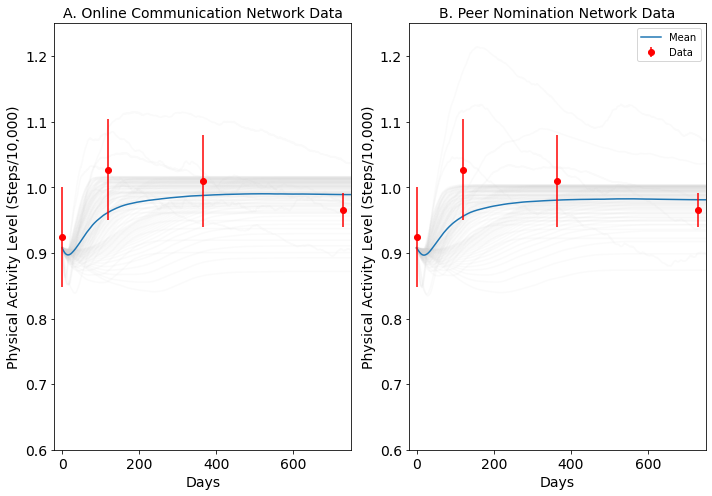

In [11]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('A. Online Communication Network Data', fontsize=14)
ax1.set_ylim([0.6, 1.25])
ax1.set_xlim([-20,750])
ax1.set_ylabel('Physical Activity Level (Steps/10,000)', fontsize=14)
ax1.set_xlabel('Days', fontsize=14)
ax1.tick_params(axis='both', which='both', labelsize=14)
ax1.plot(avg_by_run_com, color='lightgrey', alpha=0.1)
ax1.plot(avg_by_run_com.mean(axis=1), label="Mean")
ax1.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')

ax2.set_title('B. Peer Nomination Network Data', fontsize=14)
ax2.set_ylim([0.6, 1.25])
ax2.set_xlim([-20,750])
ax2.set_ylabel('Physical Activity Level (Steps/10,000)', fontsize=14)
ax2.set_xlabel('Days', fontsize=14)
ax2.tick_params(axis='both', which='both', labelsize=14)
#for i in range(100):
#    ax1.plot(avg_by_run_nom.index, avg_by_run_nom[f'y{i+1}'], color='lightgrey', alpha=0.3)
ax2.plot(avg_by_run_nom_soc, color='lightgrey', alpha=0.1)
ax2.plot(avg_by_run_nom_soc.mean(axis=1), label="Mean")
ax2.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')
ax2.legend()

fig.tight_layout()

# Save plot
fig.savefig('../output/plots/fig_calibration.png', bbox_inches='tight', format='png', dpi=1000)
fig.show()

In [28]:
sd_com = avg_by_run_com.std(axis=1)
sd_nom_soc = avg_by_run_nom_soc.std(axis=1)

mean_com = avg_by_run_com.mean(axis=1)
error_com = sd_com * 1.96 / np.sqrt(100)
lower_com = mean_com - error_com
upper_com = mean_com + error_com

mean_nom_soc = avg_by_run_nom_soc.mean(axis=1)
error_nom_soc = sd_nom_soc * 1.96 / np.sqrt(100)
lower_nom_soc = mean_nom_soc - error_nom_soc
upper_nom_soc = mean_nom_soc + error_nom_soc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


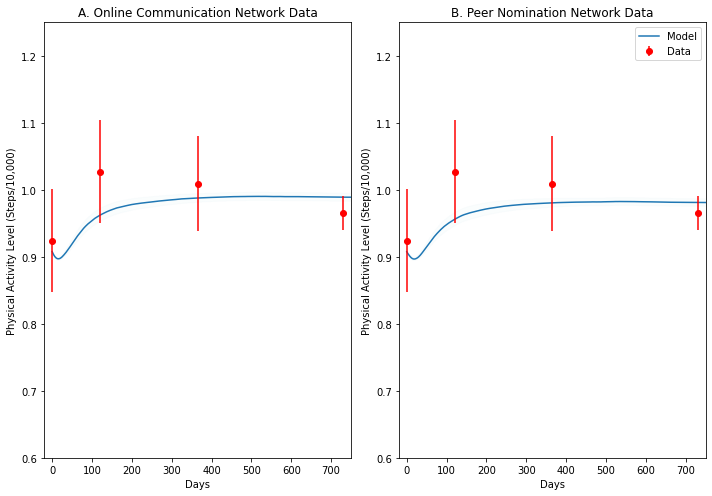

In [29]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('A. Online Communication Network Data')
ax1.set_ylim([0.6, 1.25])
ax1.set_xlim([-20,750])
ax1.set_ylabel('Physical Activity Level (Steps/10,000)')
ax1.set_xlabel('Days')
ax1.plot(mean_com, label="Model")
ax1.fill_between(x=mean_com.index, y1=lower_com, y2=upper_com, color='lightblue', alpha=0.05)
ax1.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')

ax2.set_title('B. Peer Nomination Network Data')
ax2.set_ylim([0.6, 1.25])
ax2.set_xlim([-20,750])
ax2.set_ylabel('Physical Activity Level (Steps/10,000)')
ax2.set_xlabel('Days')
ax2.plot(mean_nom_soc, label="Model")
ax2.fill_between(x=mean_nom_soc.index, y1=lower_nom_soc, y2=upper_nom_soc, color='lightblue', alpha=0.05)
ax2.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')
ax2.legend()

fig.tight_layout()

# Save plot
fig.savefig('../output/plots/fig_calibration.eps', bbox_inches='tight', format='eps', dpi=1000)
fig.show()